# 地铁交通数据分析

In [1]:
from cProfile import label

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyQt5.QtWidgets.QWidget import width
from matplotlib.pyplot import figure
from pandas.io.formats.style import color

plt.rcParams['font.sans-serif'] = ['SimHei']  ## Mac
plt.rcParams['font.family'] = 'Arial Unicode MS'  ## Mac
plt.rcParams['font.sans-serif'] = ['SimHei']  ## Win
plt.rcParams['font.family'] = ['SimHei']  ## win
plt.rcParams['axes.unicode_minus'] = False

#### 1、观察数据

In [2]:
dataPath = './data/data.csv'
df = pd.read_csv(dataPath)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/data.csv'

In [3]:
df.shape

NameError: name 'df' is not defined

In [4]:
df.isnull()

NameError: name 'df' is not defined

In [5]:
df.dtypes

NameError: name 'df' is not defined

In [6]:
df.describe()

NameError: name 'df' is not defined

#### 1.2 数据类型转换

In [7]:
df['time'] = pd.to_datetime(df['time'])
df.head()
df.dtypes

NameError: name 'df' is not defined

In [8]:
df['date1'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df.head()

NameError: name 'df' is not defined

In [9]:
df['date2'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%H:%M:%S')
df.head()

NameError: name 'df' is not defined

In [10]:
df['hours'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.hour
df.head()
df.shape
df.dtypes

NameError: name 'df' is not defined

#### 1.3 清除异常值

In [11]:
print("原始数据: ", df.shape[0])
D = df[(df['hours'] <= 6) | (df['hour'] >= 23)]
print("异常值: ", D.shape[0])

df.drop(df[(df['hours'] <= 6) | (df['hour'] >= 23)].index, inplace=True)
df.shape

NameError: name 'df' is not defined

In [12]:
# 查看地铁矩阵图
import seaborn as sns

road_map = pd.read_csv('./data/road_map.csv')
print(road_map.shape)
road_map = road_map.dropna(['Unnamed: 0'], axis=1)
road_map.head(5)

ModuleNotFoundError: No module named 'seaborn'

In [13]:
# 地铁热力图
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(16, 16))
    colormap = sns.diverging_palette(150, 10, as_cmap=True)

    _ = sns.heatmap(
        df,
        cmap=colormap,
        square=True,
        cbar_kws={"shrink": 0.5},
        ax=ax,
        linewidths=0.1, vmax=1.0, linecolor='white',
    )
    plt.title("", y=1.05, size=15)


correlation_heatmap(road_map)

SyntaxError: positional argument follows keyword argument (1948023293.py, line 13)

#### 绘制地铁线路数值分布柱状图

In [14]:
y_A = df[df['lineID'] == 'A'].shape[0]
y_B = df[df['lineID'] == 'B'].shape[0]
y_C = df[df['lineID'] == 'C'].shape[0]
print("LineA记录数: ", y_A, end='  ')
print("LineB记录数: ", y_B, end='  ')
print("LineC记录数: ", y_C, end='  ')

x = ['Line A', 'Line B', 'Line C']
y = [y_A, y_B, y_C]
plt.title("")
plt.bar(x, y, width=0.3, label='线路分布')
plt.xlabel("地铁线路")
plt.ylabel("数值分布")
plt.show()

NameError: name 'df' is not defined

#### 使用seaborn库绘制地铁各个站点压力分布柱状图

In [15]:
number_of_stationID = df.stationID.value_count()
print(number_of_stationID)
fig = plt.figure(figsize=(15, 8), dpi=80)
plt.title("")
ax = sns.barplot(x=number_of_stationID.index, y=number_of_stationID, label="站点压力情况")
text = ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel("地铁站点（共80个）")
plt.ylabel("站点压力值")
plt.legend()
plt.show()

NameError: name 'df' is not defined

In [16]:
df.groupby('lineID')['stationID'].nunique()

NameError: name 'df' is not defined

In [17]:
LineStation = [['A', 14], ['B', 34], ['C', 32]]
LineStation = pd.DataFrame(LineStation, columns=['lineID', 'stationNum'])
LineStation.head()

,lineID,stationNum
0,A,14


#### 筛选出线路ABC的进出站数据

In [18]:
A_status_1 = df[(df['lineID'] == 'A') & df(df['status'] == 1.0)].shape[0]
A_status_0 = df[(df['lineID'] == 'A') & df(df['status'] == 0.0)].shape[0]

B_status_1 = df[(df['lineID'] == 'B') & df(df['status'] == 1.0)].shape[0]
B_status_0 = df[(df['lineID'] == 'B') & df(df['status'] == 0.0)].shape[0]

C_status_1 = df[(df['lineID'] == 'C') & df(df['status'] == 1.0)].shape[0]
C_status_0 = df[(df['lineID'] == 'C') & df(df['status'] == 0.0)].shape[0]

print("线路A进出站数据: ", A_status_1, A_status_0)
print("线路B进出站数据: ", B_status_1, B_status_0)
print("线路C进出站数据: ", C_status_1, C_status_0)

NameError: name 'df' is not defined

#### 绘制三条线路的进出站情况（柱状图）

In [19]:
x = ['Line A', 'Line B', 'Line C']
y_1 = [A_status_1, B_status_1, C_status_1]
y_2 = [A_status_0, B_status_0, C_status_0]

bar_width = 0.2
x_1 = list(range(len(x)))
x_2 = [i + bar_width for i in x_1]
plt.figure(figsize=(10, 8), dpi=80)
plt.grid(alpha=0.5)
plt.title("")

plt.bar(range(len(x)), y_1, width=bar_width, color='#FFC0FB', label="进站情况")
plt.bar(x_2, y_2, width=bar_width, color='#00FFFF', label="出站情况")
plt.xlabel("地铁线路")
plt.ylabel("数值分布")
plt.legend()
plt.xticks(range(len(x)), x)
plt.show()

NameError: name 'A_status_1' is not defined

In [20]:
pd.set_option('display.max_rows', None)
df.groupby('stationID')['deviceID'].nunique()

NameError: name 'df' is not defined

#### 用户、刷卡类型

In [21]:
print('用户数: ', df.userID.nunique())
print('刷卡类型统计: ', df.payType.value_counts())
print("刷卡类型用户分布: ", df.groupby('payType')['userID'].nunique())

NameError: name 'df' is not defined

NameError: name 'df' is not defined

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

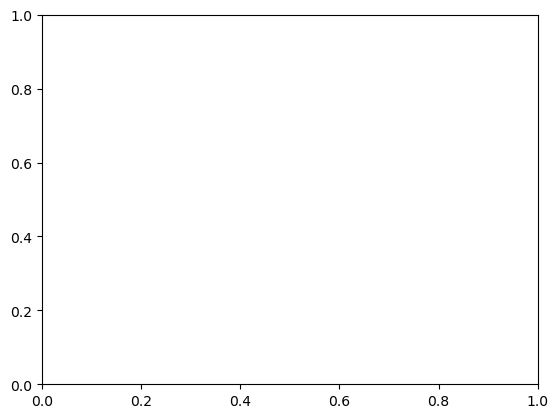

In [22]:
# 绘制直方图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['hours'], bins=16, color='#00CED1', edgecolor='white')
plt.title("")
plt.xlabel("每小时")
plt.ylabel("数值分布")
x_list = [x for x in range(7, 23)]
plt.xticks(x_list)
plt.show()

In [23]:
# 根据进出站状态对直方图进行调整
g = sns.FacetGrid(df, col='status')
g.map(plt.hist, 'hour', color='#3CB371', edgecolor='white', alpha=.75, bins=16)
x_list = [x for x in range(7, 23, 2)]
plt.xticks(x_list)
plt.show()

NameError: name 'sns' is not defined